# Logistic regression project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the [Heart Disease dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and create a logistic regression model that will predict whether or not a person has presence of heart disease based on physical features of that person (age, sex, cholesterol, etc...).

In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset exploration

In [2]:
# Read the dataset to be used

heart_df = pd.read_csv("data/HeartDisease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Let's see descriptive statistics

heart_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


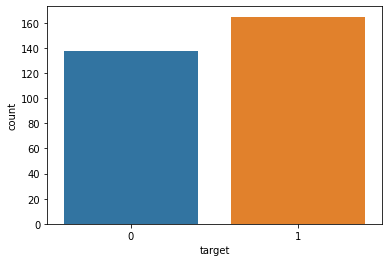

In [5]:
# Let's visualize how many points of each class we have
sns.countplot(data=heart_df, x="target")

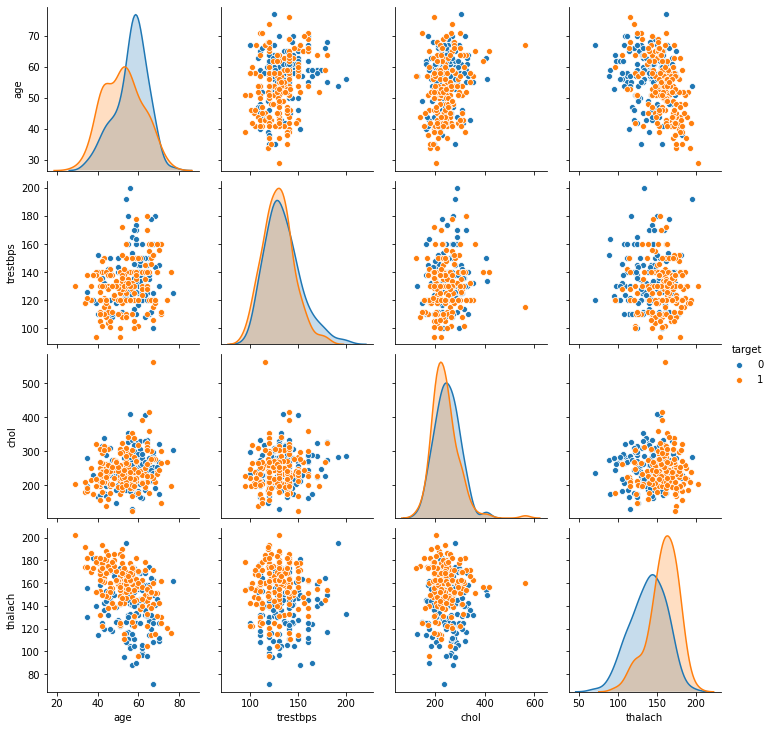

In [6]:
# Creation of a pairplot to display the relationships between some columns and with the final target
sns.pairplot(data=heart_df[["age","trestbps", "chol","thalach","target"]], hue="target")

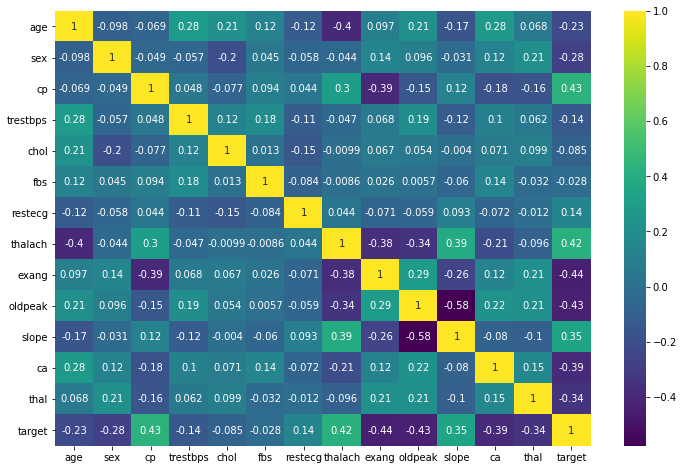

In [7]:
# Let's visualize the correlation between all columns
plt.figure(figsize=(12, 8))
sns.heatmap(data=heart_df.corr(), annot=True, cmap='viridis')

### Features scaling

First, we need to split the dataset into two columns, the features and the prediction. Then, we will split the dataset into training and test sets, and scale the data.

In [8]:
X = heart_df.drop("target", axis=1)
y = heart_df["target"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Model creation

Now we can create the logistic regression model. We will tune the hyperparameters using LogisticRegressionCV, that use cross-validation to find the better C parameter to the model.

In [10]:
from sklearn.linear_model import LogisticRegressionCV 

logistic_regression_model = LogisticRegressionCV()
logistic_regression_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [11]:
# We can check for the C value and the coefficients of the model
print(logistic_regression_model.C_)
print(logistic_regression_model.coef_)

[0.04641589]
[[-0.09675782 -0.39417728  0.49120503 -0.12818286 -0.04559729 -0.0309193
   0.16578445  0.24180537 -0.30436913 -0.42156474  0.27305138 -0.44934776
  -0.38487934]]


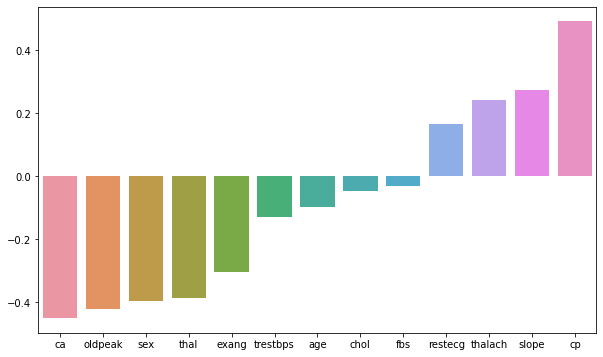

In [12]:
# We can also plot how important the features are (considering the coefficients of the model)
model_coefficients = pd.Series(index=X.columns, data=logistic_regression_model.coef_[0])
model_coefficients = model_coefficients.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=model_coefficients.index, y=model_coefficients.values)

### Performance evaluation

We will analyze the performance of the model through different metrics. Let's plot the confusion matrix and take a look to the classification report.

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

y_pred = logistic_regression_model.predict(scaled_X_test)

In [14]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[17,  2],
       [ 0, 12]])

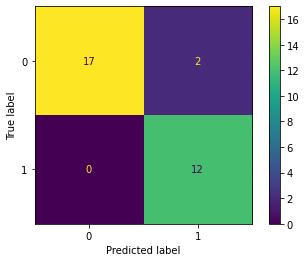

In [15]:
# Confusion matrix plot
plot_confusion_matrix(logistic_regression_model, scaled_X_test, y_test)

In [16]:
# Classification report
# Here we can see precision, recall, f1-score and support for both classes (0, 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.86      1.00      0.92        12

    accuracy                           0.94        31
   macro avg       0.93      0.95      0.93        31
weighted avg       0.94      0.94      0.94        31



### Performance Curves

Let's also plot the precision recall curve and the ROC curve.

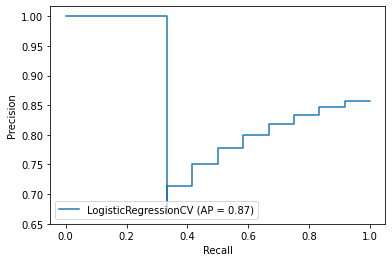

In [17]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_precision_recall_curve(logistic_regression_model, scaled_X_test, y_test)

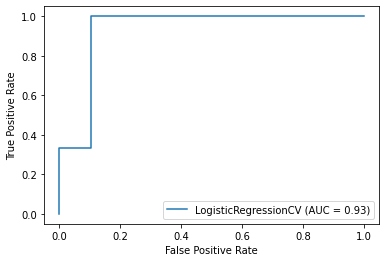

In [18]:
plot_roc_curve(logistic_regression_model, scaled_X_test, y_test)